In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
f = open("../datasets/_chat.txt", 'r', encoding='utf-8')

In [3]:
data = f.read()

In [4]:
print(data)

[7/1/23 13:56:30] ASDS 9thBatch Section B: ‎Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.
[7/1/23 13:56:30] Mustafizur Vaiya ASDS: ‎Mustafizur Vaiya ASDS created this group
[7/1/23 13:57:38] ASDS 9thBatch Section B: ‎Mustafizur Vaiya ASDS added you
[7/1/23 14:00:30] Mustafizur Vaiya ASDS: ‎Mustafizur Vaiya ASDS changed the group name to “ASDS 9thBatch Section B”
[7/1/23 13:59:18] Mustafizur Vaiya ASDS: Hello to all Bosses
[7/1/23 13:59:34] ~ Sujoy Dey: Hello
[7/1/23 13:59:42] ~ Mehedi Hasan: As-salamu alaykum vaia
[7/1/23 14:00:35] ~ Mahathir Mohammed: Hola 😊
[7/1/23 14:01:41] ~ Tonmoy: Hello all 😀
[7/1/23 14:02:02] Mustafizur Vaiya ASDS: This is WhatsApp group has been created for the genius 😋😋😋 of section B only.
‎[7/1/23 14:06:22] Mustafizur Vaiya ASDS: ‎image omitted
‎[7/1/23 14:06:33] Mustafizur Vaiya ASDS: ‎image omitted
‎[7/1/23 14:06:42] Mustafizur Vaiya ASDS: ‎image omitted
[7/1/23 14:24:22] ~ Shohag: T

In [5]:

# Define the regular expression pattern to extract the date, time, and message
pattern = r'(\[\d{1,2}/\d{1,2}/\d{2,4} \d{2}:\d{2}:\d{2}\])'

# Split the data using the regular expression pattern
split_data = re.split(pattern, data)[1:]

# Extract the matched groups and store them in lists
date_time = [split_data[i].strip() for i in range(0, len(split_data), 2)]
messages = [split_data[i + 1].strip() for i in range(0, len(split_data), 2)]

# Create a DataFrame
df = pd.DataFrame({'Date_Time': date_time, 'Message': messages})



In [6]:
df.head(10)

,Date_Time,Message
0,[7/1/23 13:56:30],ASDS 9thBatch Section B: ‎Messages and calls a...
1,[7/1/23 13:56:30],Mustafizur Vaiya ASDS: ‎Mustafizur Vaiya ASDS ...
2,[7/1/23 13:57:38],ASDS 9thBatch Section B: ‎Mustafizur Vaiya ASD...
3,[7/1/23 14:00:30],Mustafizur Vaiya ASDS: ‎Mustafizur Vaiya ASDS ...
4,[7/1/23 13:59:18],Mustafizur Vaiya ASDS: Hello to all Bosses
5,[7/1/23 13:59:34],~ Sujoy Dey: Hello
6,[7/1/23 13:59:42],~ Mehedi Hasan: As-salamu alaykum vaia
7,[7/1/23 14:00:35],~ Mahathir Mohammed: Hola 😊
8,[7/1/23 14:01:41],~ Tonmoy: Hello all 😀
9,[7/1/23 14:02:02],Mustafizur Vaiya ASDS: This is WhatsApp group ...


In [7]:
# Remove '[' and ']' from Date_Time column
df['Date_Time'] = df['Date_Time'].str.replace(r'[\[\]]', '')

# Remove '~ ' from Message column
df['Message'] = df['Message'].str.replace(r'~', '')

# Convert into datetime format
df['Date_Time'] = pd.to_datetime(df['Date_Time'], format='%d/%m/%y %H:%M:%S')

# Remove the white space from message column
df['Message'] = df['Message'].str.strip()

# Display the updated DataFrame
df.head()


/Users/macbookpro/anaconda3/envs/whatsAppDataAnalysis/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,Date_Time,Message
0,2023-01-07 13:56:30,ASDS 9thBatch Section B: ‎Messages and calls a...
1,2023-01-07 13:56:30,Mustafizur Vaiya ASDS: ‎Mustafizur Vaiya ASDS ...
2,2023-01-07 13:57:38,ASDS 9thBatch Section B: ‎Mustafizur Vaiya ASD...
3,2023-01-07 14:00:30,Mustafizur Vaiya ASDS: ‎Mustafizur Vaiya ASDS ...
4,2023-01-07 13:59:18,Mustafizur Vaiya ASDS: Hello to all Bosses


In [8]:
df.shape

(5870, 2)

In [9]:
# Rename the columns name
df.rename(columns={'Date_Time': 'date', 'Message': 'user_message'}, inplace=True)
df.head()

,date,user_message
0,2023-01-07 13:56:30,ASDS 9thBatch Section B: ‎Messages and calls a...
1,2023-01-07 13:56:30,Mustafizur Vaiya ASDS: ‎Mustafizur Vaiya ASDS ...
2,2023-01-07 13:57:38,ASDS 9thBatch Section B: ‎Mustafizur Vaiya ASD...
3,2023-01-07 14:00:30,Mustafizur Vaiya ASDS: ‎Mustafizur Vaiya ASDS ...
4,2023-01-07 13:59:18,Mustafizur Vaiya ASDS: Hello to all Bosses


In [10]:
# Separate users and messages
users = []
messages = []
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])

    else:
        users.append('group_notification')
        messages.append(entry[0])

df['user'] = users
df['message'] = messages
df.drop(columns='user_message', inplace=True)

df.head()


,date,user,message
0,2023-01-07 13:56:30,ASDS 9thBatch Section B,‎Messages and calls are end-to-end encrypted. ...
1,2023-01-07 13:56:30,Mustafizur Vaiya ASDS,‎Mustafizur Vaiya ASDS created this group
2,2023-01-07 13:57:38,ASDS 9thBatch Section B,‎Mustafizur Vaiya ASDS added you
3,2023-01-07 14:00:30,Mustafizur Vaiya ASDS,‎Mustafizur Vaiya ASDS changed the group name ...
4,2023-01-07 13:59:18,Mustafizur Vaiya ASDS,Hello to all Bosses


In [11]:
df['year'] = df['date'].dt.year

In [12]:
df['month'] = df['date'].dt.month_name()

In [13]:
df['day'] = df['date'].dt.day 

In [14]:
df['hour'] = df['date'].dt.hour

In [15]:
df['minute'] = df['date'].dt.minute

In [16]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2023-01-07 13:56:30,ASDS 9thBatch Section B,‎Messages and calls are end-to-end encrypted. ...,2023,January,7,13,56
1,2023-01-07 13:56:30,Mustafizur Vaiya ASDS,‎Mustafizur Vaiya ASDS created this group,2023,January,7,13,56
2,2023-01-07 13:57:38,ASDS 9thBatch Section B,‎Mustafizur Vaiya ASDS added you,2023,January,7,13,57
3,2023-01-07 14:00:30,Mustafizur Vaiya ASDS,‎Mustafizur Vaiya ASDS changed the group name ...,2023,January,7,14,0
4,2023-01-07 13:59:18,Mustafizur Vaiya ASDS,Hello to all Bosses,2023,January,7,13,59


In [17]:
# Sort values by Date_Time in ascending order
df = df.sort_values(by='date', ascending=True)
df.head()

,date,user,message,year,month,day,hour,minute
0,2023-01-07 13:56:30,ASDS 9thBatch Section B,‎Messages and calls are end-to-end encrypted. ...,2023,January,7,13,56
1,2023-01-07 13:56:30,Mustafizur Vaiya ASDS,‎Mustafizur Vaiya ASDS created this group,2023,January,7,13,56
2,2023-01-07 13:57:38,ASDS 9thBatch Section B,‎Mustafizur Vaiya ASDS added you,2023,January,7,13,57
4,2023-01-07 13:59:18,Mustafizur Vaiya ASDS,Hello to all Bosses,2023,January,7,13,59
5,2023-01-07 13:59:34,Sujoy Dey,Hello,2023,January,7,13,59


In [18]:
df['user'].value_counts()

Asif                       1429
Mustafizur Vaiya ASDS       624
Rushmila                    413
Musleh-Ur Rahman Sakib      395
Pervej Vai  ASDS            357
Minhaz                      239
Maksudur Rahman Moon        232
STARK                       226
Mustain Billah              223
Mahfuzul Haque Nayeem       221
Anik Roy                    207
nishan                      122
Tonmoy                      113
Sanaullah                   106
Imran Farid                  88
Mahathir Mohammed            68
Sayed Hossain Khan           65
Md. Mazidul Islam            64
Sujoy Dey                    63
Rasel  Rana                  62
Rashedul Hasan               59
Md. Mashiur Rahman Asds      47
Jakaria Muhammed Jakir       46
Faisal...                    46
Abdul Mozid                  43
Shohag                       42
Rahat Bashir                 41
Anzir Ferdous Asds           35
Asif Al Amin                 30
Tawhid Rahman                28
Abrar                        27
Tultul  

In [19]:
df['user'].unique()

array(['ASDS 9thBatch Section B', 'Mustafizur Vaiya ASDS', 'Sujoy Dey',
       'Mehedi Hasan', 'Mahathir Mohammed', 'Tonmoy', 'Shohag',
       'Sayed Hossain Khan', 'Asif Al Amin', 'Etana',
       'Prof Zahid Asds 9th', 'Faisal...', 'Imran Farid',
       'Noor Nabi Sayem', 'nishan', 'Mahfuzul Haque Nayeem',
       'Rasel  Rana', 'Asif', 'Rahat Bashir', 'Kabbo', 'Supti🌼',
       'Abdul Mozid', 'Musleh-Ur Rahman Sakib', 'Anik Roy',
       'Mustain Billah', 'Pervej Vai  ASDS', 'Rushmila',
       'Maksudur Rahman Moon', 'Tultul', 'Minhaz', 'Asif Mahmud',
       'Rashedul Hasan', 'STARK', 'Anzir Ferdous Asds',
       'Jakaria Muhammed Jakir', 'Rakib Hossain', 'Mithila',
       'rssnigdha699', 'Nahida🥰', '\u202a+880\xa01568‑847288\u202c',
       'Md. Mashiur Rahman Asds', 'Md. Mazidul Islam', 'Sanaullah',
       'Tawhid Rahman', 'Abrar', '\u202a+880\xa01710‑039345\u202c',
       'Akash'], dtype=object)

In [20]:
df['message'].head(20)

0     ‎Messages and calls are end-to-end encrypted. ...
1             ‎Mustafizur Vaiya ASDS created this group
2                      ‎Mustafizur Vaiya ASDS added you
4                                   Hello to all Bosses
5                                                 Hello
6                                As-salamu alaykum vaia
3     ‎Mustafizur Vaiya ASDS changed the group name ...
7                                                Hola 😊
8                                           Hello all 😀
9     This is WhatsApp group has been created for th...
10                                    ‎image omitted\n‎
11                                    ‎image omitted\n‎
12                                       ‎image omitted
13                                           Thanks vai
14    Thanks. Inshallah ASDS 9th batch section B wil...
16         Assalamu Alaikum Bhai, Thanks for adding us!
15                  ‎Mustafizur Vaiya ASDS added  Etana
17    Assalamu Alaikum. Thank you very much for 

In [21]:
df[df['message'].str.contains('image omitted')].shape[0]

665

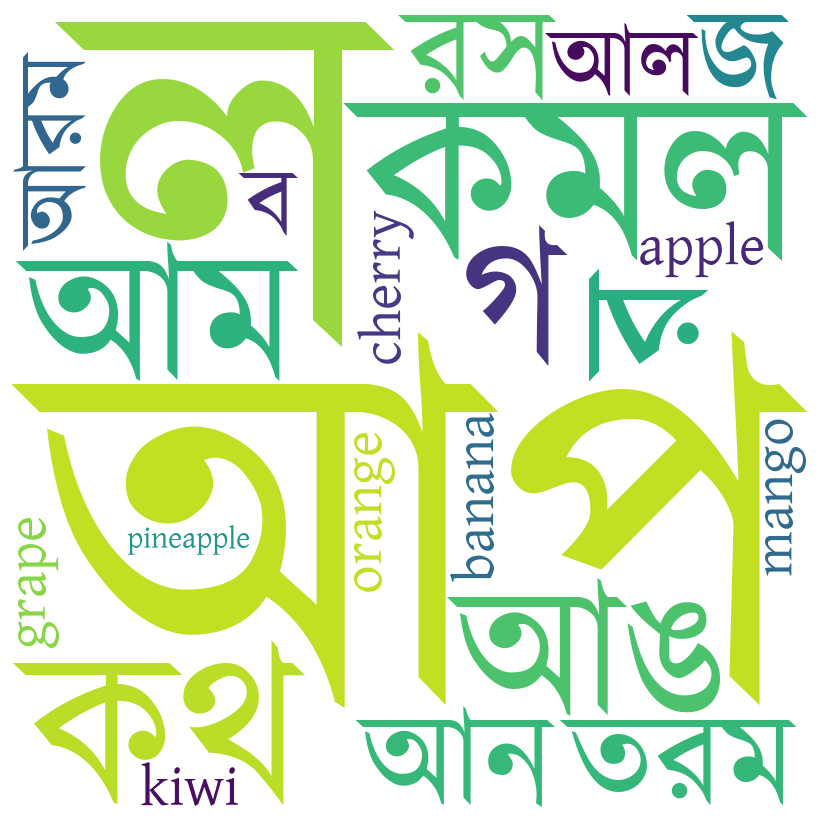

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from bidi.algorithm import get_display

# Sample text data including mixed Bangla and English words
text_data = "আপেল কমলা কথা আম আঙ্গুর আনারস তরমুজ আলু আরম্ব apple orange banana cherry grape mango kiwi pineapple"

# Define the function to handle mixed languages
def bidi_format(text):
    return get_display(text)

# Generate a word cloud with the appropriate font and bidi formatting
wordcloud = WordCloud(width=800, height=800, font_path='kalpurush.ttf',
                      background_color='white', min_font_size=10).generate(bidi_format(text_data))

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad=0)

# Show the plot
plt.show()


In [30]:
df['only_date'] = df['date'].dt.date

In [33]:
daily_timeline = df.groupby('only_date')['message'].count().reset_index()

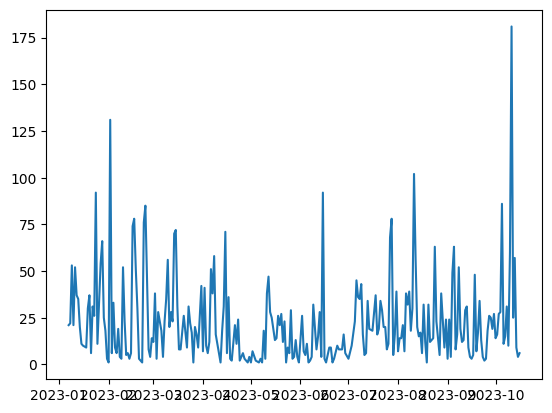

In [34]:
plt.plot(daily_timeline['only_date'], daily_timeline['message'])
plt.show()

In [36]:
df['day_name'] = df['date'].dt.day_name()

In [37]:
df['day_name'].value_counts()

Thursday     1284
Friday       1210
Saturday      775
Wednesday     688
Monday        661
Tuesday       657
Sunday        595
Name: day_name, dtype: int64

In [38]:
period = []
for hour in df[['day_name', 'hour']]['hour']:
    if hour == 23:
        period.append(str(hour) + "-" + str('00'))
    elif hour == 0:
        period.append(str('00') + '-' + str(hour + 1))
    else:
        period.append(str(hour) + '-' + str(hour + 1))



In [40]:
df['period'] = period

In [41]:
df.pivot_table(index='day_name', columns='period', values='message', aggfunc='count').fillna(0)


period,00-1,1-2,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,...,21-22,22-23,23-00,3-4,4-5,5-6,6-7,7-8,8-9,9-10
day_name,,,,,,,,,,,,,,,,,,,,,
Friday,99.0,21.0,43.0,111.0,88.0,31.0,126.0,111.0,119.0,37.0,...,60.0,23.0,26.0,0.0,0.0,0.0,5.0,86.0,37.0,74.0
Monday,23.0,19.0,22.0,31.0,11.0,27.0,32.0,71.0,68.0,30.0,...,83.0,49.0,33.0,1.0,0.0,0.0,0.0,1.0,5.0,12.0
Saturday,37.0,7.0,15.0,30.0,30.0,80.0,58.0,25.0,43.0,34.0,...,120.0,87.0,61.0,0.0,0.0,0.0,1.0,7.0,20.0,11.0
Sunday,27.0,25.0,18.0,20.0,28.0,20.0,52.0,48.0,80.0,54.0,...,30.0,53.0,28.0,1.0,1.0,0.0,0.0,1.0,5.0,8.0
Thursday,22.0,20.0,25.0,51.0,162.0,107.0,43.0,60.0,52.0,43.0,...,61.0,155.0,152.0,2.0,2.0,1.0,0.0,0.0,15.0,15.0
Tuesday,17.0,8.0,27.0,41.0,39.0,83.0,76.0,45.0,22.0,33.0,...,55.0,28.0,68.0,1.0,0.0,0.0,1.0,3.0,4.0,9.0
Wednesday,16.0,10.0,39.0,55.0,56.0,11.0,12.0,82.0,37.0,33.0,...,88.0,74.0,59.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0
